# Initialize H2O

In [2]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 days 23 hours 24 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_rooma_9j55xb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.890 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# Load Data

In [3]:
# Use local data file or download from GitHub
import os
import pandas as pd
data_path = "/Users/rooma/Downloads/creditcard.csv"


# Load data into H2O
df = h2o.import_file(data_path)
creditData = pd.read_csv(data_path) 

Parse progress: |█████████████████████████████████████████████████████████| 100%


# Data Visualization

In [4]:
df.describe()


Rows:284807
Cols:31




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0.0
mean,94813.85957508099,1.328442755752275e-15,4.087516171545461e-16,-1.5839125164738662e-15,2.209813430241765e-15,1.0729729950306835e-15,1.3156692677161953e-15,-4.981660334071031e-16,2.2992278464943217e-16,-2.203426686223725e-15,2.1108188979621483e-15,2.082078549880969e-15,-1.558365540401707e-15,7.05735213993396e-16,1.6350064686181845e-15,4.866698941746315e-15,1.3747466498830633e-15,-2.2992278464943217e-16,1.1304536911930417e-15,9.99525438823226e-16,6.195141697498589e-16,1.9479569255021338e-16,-2.554697607215913e-16,3.0975708487492947e-16,4.489881044681968e-15,6.76994865912217e-16,1.705260652816622e-15,-3.641442019035495e-16,-1.2314440809782957e-16,88.34961925093138,0.001727485630620034
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1.0
sigma,47488.14595456652,1.9586958038574862,1.6513085794769973,1.5162550051777715,1.4158685749409203,1.3802467340314382,1.3322710897575754,1.237093598182667,1.194352902669203,1.0986320892243189,1.0888497654025167,1.0207130277115588,0.9992013895301447,0.9952742301251528,0.9585956112570638,0.9153160116104389,0.87625288738837,0.8493370636743898,0.838176209528841,0.8140405007685778,0.7709250248871169,0.7345240143713138,0.7257015604409117,0.6244602955949904,0.6056470678271598,0.5212780705409428,0.48222701326105744,0.4036324949650303,0.3300832641602511,250.12010924018873,0.041527189635465055
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,284315
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0.0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.6245014594248

In [4]:
y = "Class"
df[y] = df[y].asfactor()
df.describe()


Rows:284807
Cols:31




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,enum
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,
mean,94813.85957508099,1.328442755752275e-15,4.087516171545461e-16,-1.5839125164738662e-15,2.209813430241765e-15,1.0729729950306835e-15,1.3156692677161953e-15,-4.981660334071031e-16,2.2992278464943217e-16,-2.203426686223725e-15,2.1108188979621483e-15,2.082078549880969e-15,-1.558365540401707e-15,7.05735213993396e-16,1.6350064686181845e-15,4.866698941746315e-15,1.3747466498830633e-15,-2.2992278464943217e-16,1.1304536911930417e-15,9.99525438823226e-16,6.195141697498589e-16,1.9479569255021338e-16,-2.554697607215913e-16,3.0975708487492947e-16,4.489881044681968e-15,6.76994865912217e-16,1.705260652816622e-15,-3.641442019035495e-16,-1.2314440809782957e-16,88.34961925093138,
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,
sigma,47488.14595456652,1.9586958038574862,1.6513085794769973,1.5162550051777715,1.4158685749409203,1.3802467340314382,1.3322710897575754,1.237093598182667,1.194352902669203,1.0986320892243189,1.0888497654025167,1.0207130277115588,0.9992013895301447,0.9952742301251528,0.9585956112570638,0.9153160116104389,0.87625288738837,0.8493370636743898,0.838176209528841,0.8140405007685778,0.7709250248871169,0.7345240143713138,0.7257015604409117,0.6244602955949904,0.6056470678271598,0.5212780705409428,0.48222701326105744,0.4036324949650303,0.3300832641602511,250.12010924018873,
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.1659459227635

In [6]:
# Let’s plot the Transaction class against the Frequency
import matplotlib.pyplot as plt
labels = ['normal','fraud']
classes = pd.value_counts(creditData['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt

<module 'matplotlib.pyplot' from '/Users/rooma/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

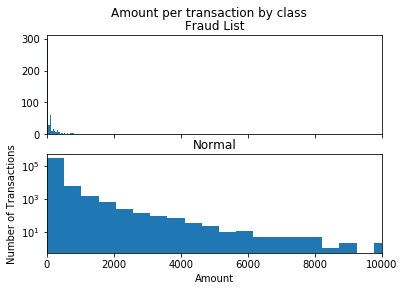

In [7]:
fraud = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
# Amount vs Class
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins = 50)
ax1.set_title('Fraud List')
ax2.hist(normal.Amount, bins = 50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show()

In [8]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


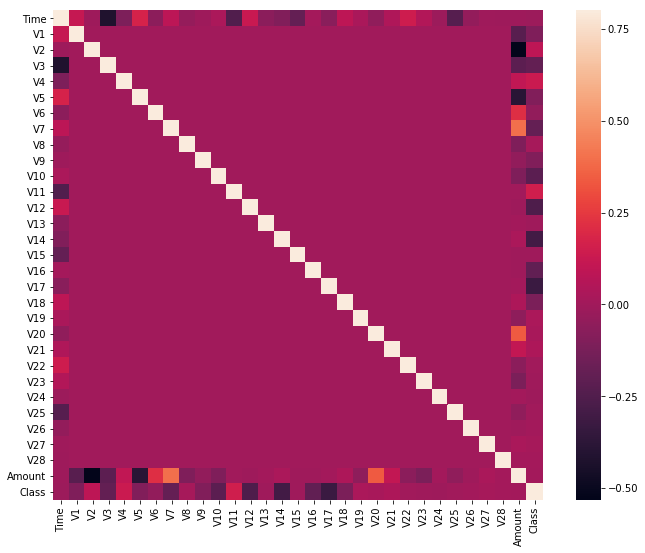

In [9]:
# Correlation matrix 
import seaborn as sns
corrmat = creditData.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

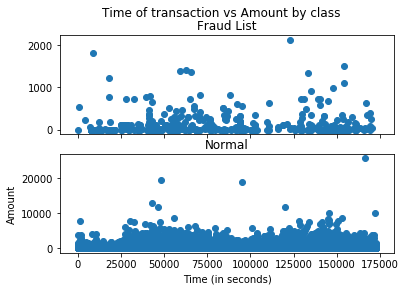

In [10]:
# time vs Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud List')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

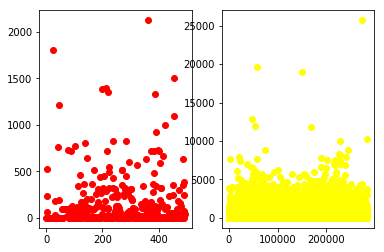

In [11]:
#plotting the dataset considering the class
color = {1:'red', 0:'yellow'}
fraudlist = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
fig,axes = plt.subplots(1,2)
axes[0].scatter(list(range(1,fraudlist.shape[0] + 1)), fraudlist.Amount,color='red')
axes[1].scatter(list(range(1, normal.shape[0] + 1)), normal.Amount,color='yellow')
plt.show()

# Split Data

In [5]:
splits = df.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]
print (train.nrow)
print (valid.nrow)
print (test.nrow)

199614
42568
42625


# Apply AutoML

In [13]:

x = df.columns
x.remove(y)

aml = H2OAutoML(max_models = 5, seed = 5)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


# Check Leaderboard

In [14]:

lb = aml.leaderboard

lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20200610_200453,0.981223,0.00280724,0.836923,0.0950012,0.0214473,0.000459988
XGBoost_2_AutoML_20200610_200453,0.980198,0.00272923,0.843394,0.10346,0.0211379,0.000446809
XGBoost_3_AutoML_20200610_200453,0.979795,0.00277573,0.843222,0.10345,0.0207502,0.00043057
GLM_1_AutoML_20200610_200453,0.974296,0.0045291,0.708208,0.11071,0.0284607,0.000810013
StackedEnsemble_AllModels_AutoML_20200610_200453,0.959114,0.0032519,0.836002,0.0935572,0.0212866,0.000453121
StackedEnsemble_BestOfFamily_AutoML_20200610_200453,0.952582,0.00325283,0.833266,0.0935622,0.0214401,0.000459679
DRF_1_AutoML_20200610_200453,0.94458,0.00486529,0.838726,0.102028,0.0212102,0.000449874


# Predict Class

In [15]:
preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


# Check model performance

In [16]:
aml.leader.model_performance(valid)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0003117650160448946
RMSE: 0.017656868806356765
LogLoss: 0.002007308974396475
Mean Per-Class Error: 0.042402436751070915
AUC: 0.9895473441693707
AUCPR: 0.8667567156774566
Gini: 0.9790946883387415

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8169543147087097: 


,,0,1,Error,Rate
0,0,42502.0,1.0,0.0,(1.0/42503.0)
1,1,12.0,53.0,0.1846,(12.0/65.0)
2,Total,42514.0,54.0,0.0003,(13.0/42568.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.816954,0.890756,46.0
1,max f2,0.147037,0.851393,55.0
2,max f0point5,0.874924,0.952381,44.0
3,max accuracy,0.874924,0.999695,44.0
4,max precision,0.999967,1.000000,0.0
5,max recall,0.000093,1.000000,375.0
6,max specificity,0.999967,1.000000,0.0
7,max absolute_mcc,0.816954,0.894445,46.0
8,max min_per_class_accuracy,0.000923,0.938462,310.0
9,max mean_per_class_accuracy,0.004932,0.957598,218.0



Gains/Lift Table: Avg response rate:  0.15 %, avg score:  0.16 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010008,4.507195e-03,92.238353,92.238353,0.140845,0.146558,0.140845,0.146558,0.923077,0.923077,9123.835320,9123.835320
1,,2,0.020015,1.914318e-03,0.000000,46.119177,0.000000,0.002873,0.070423,0.074716,0.000000,0.923077,-100.000000,4511.917660
2,,3,0.030023,1.208243e-03,0.000000,30.746118,0.000000,0.001518,0.046948,0.050316,0.000000,0.923077,-100.000000,2974.611773
3,,4,0.040007,8.823319e-04,1.540923,23.457681,0.002353,0.001032,0.035819,0.038017,0.015385,0.938462,54.092308,2245.768102
4,,5,0.050014,6.831832e-04,0.000000,18.763941,0.000000,0.000770,0.028652,0.030564,0.000000,0.938462,-100.000000,1776.394118
5,,6,0.100005,2.994904e-04,0.307750,9.538013,0.000470,0.000447,0.014564,0.015509,0.015385,0.953846,-69.224986,853.801341
6,,7,0.150019,1.748651e-04,0.307606,6.460729,0.000470,0.000228,0.009865,0.010415,0.015385,0.969231,-69.239441,546.072900
7,,8,0.200009,1.198334e-04,0.307750,4.922846,0.000470,0.000144,0.007517,0.007848,0.015385,0.984615,-69.224986,392.284563
8,,9,0.300038,6.695132e-05,0.153803,3.332916,0.000235,0.000090,0.005089,0.005261,0.015385,1.000000,-84.619720,233.291575
9,,10,0.399995,4.303276e-05,0.000000,2.500029,0.000000,0.000054,0.003817,0.003960,0.000000,1.000000,-100.000000,150.002937


In [20]:
#from h2o.tree import H2OTree

#tree = H2OTree(model = aml.leader, tree_number = 0 , tree_class = "NO")
#tree.show()
import matplotlib.pyplot as plt
import xgboost
from xgboost import plot_tree

plot_tree(aml.leader, num_trees=0, rankdir='LR') # model is your xgboost model, choose which tree in num_trees and layout direction default if top to bottom, LR is left to right
plt.show()

ModuleNotFoundError: No module named 'xgboost'

In [24]:
features= df.drop(['Time'], axis=1)
train, test = features.split_frame([0.8])
print(train.shape)
print(test.shape)
train_df = train.as_data_frame()
test_df = test.as_data_frame()

train_df = train_df[train_df['Class'] == 0]
train_df = train_df.drop(['Class'], axis=1)

Y_test_df = test_df['Class']

test_df = test_df.drop(['Class'], axis=1)

train_df.shape


(228037, 30)
(56770, 30)


(227636, 29)

In [25]:
train_h2o = h2o.H2OFrame(train_df) # converting to h2o frame
test_h2o = h2o.H2OFrame(test_df)
x = train_h2o.columns

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [26]:





anomaly_model = H2ODeepLearningEstimator(activation = "Tanh",
                               hidden = [14,7,7,14],
                               epochs = 100,
                               standardize = True,
                                stopping_metric = 'MSE', 
                                loss = 'automatic',
                                train_samples_per_iteration = 32,
                                shuffle_training_data = True,     
                               autoencoder = True,
                               l1 = 10e-5)
anomaly_model.train(x=x, training_frame = train_h2o)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [27]:
anomaly_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,V13,1.000000,1.000000,0.162842
1,V11,0.986058,0.986058,0.160571
2,V26,0.981695,0.981695,0.159861
3,V18,0.919887,0.919887,0.149796
4,V24,0.916271,0.916271,0.149207
5,V15,0.899101,0.899101,0.146411
6,V16,0.025669,0.025669,0.004180
7,V9,0.024775,0.024775,0.004034
8,V27,0.024474,0.024474,0.003985
9,V19,0.024051,0.024051,0.003916


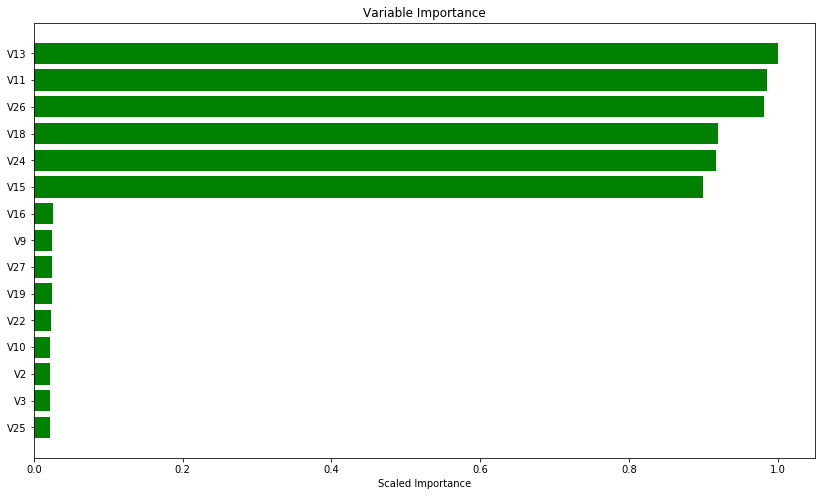

In [29]:
from pylab import rcParams
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
# plotting the variable importance
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

Text(0.5, 0, 'epoch')

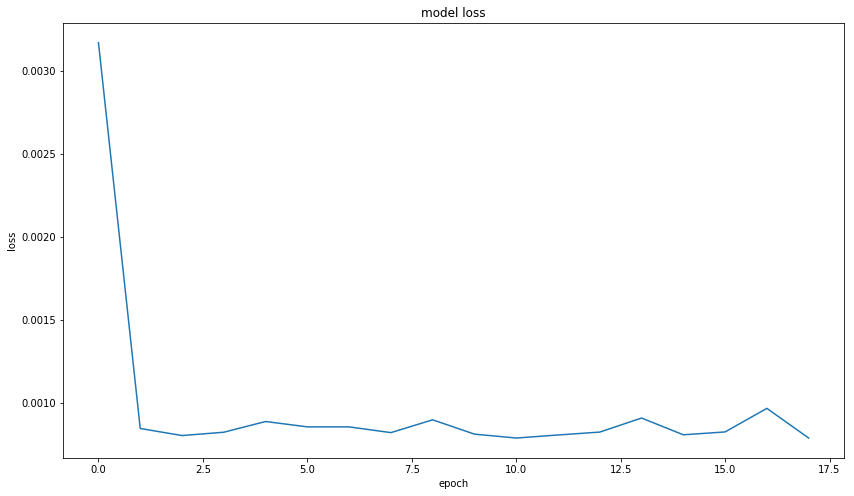

In [30]:
# plotting the loss
scoring_history = anomaly_model.score_history()
%matplotlib inline
rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

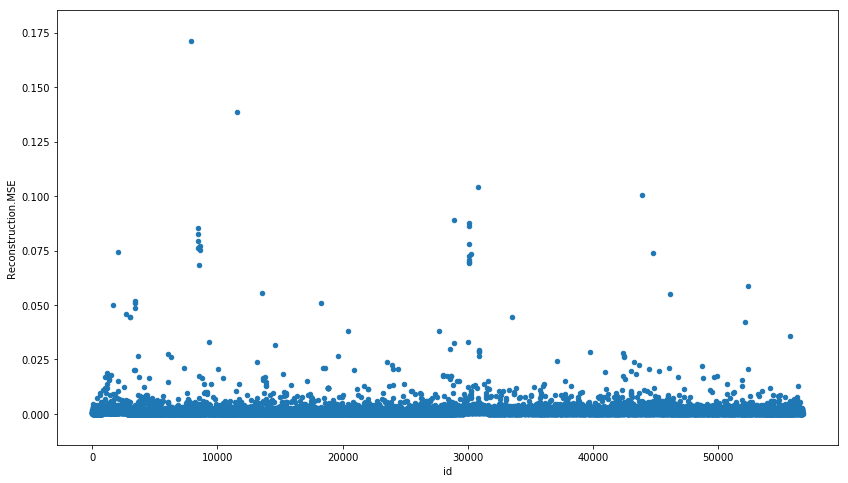

In [31]:
test_rec_error = anomaly_model.anomaly(test_h2o) 
# anomaly is a H2O function which calculates the error for the dataset
# converting to pandas dataframe
test_rec_error_df = test_rec_error.as_data_frame()
# plotting the testing dataset against the error
test_rec_error_df['id']=test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [32]:
# predicting the class for the testing dataset
predictions = anomaly_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': Y_test_df})
error_df.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%


,reconstruction_error,true_class
count,56770.000000,56770.000000
mean,0.000837,0.001603
std,0.002259,0.040005
min,0.000054,0.000000
25%,0.000320,0.000000
50%,0.000525,0.000000
75%,0.000905,0.000000
max,0.171193,1.000000


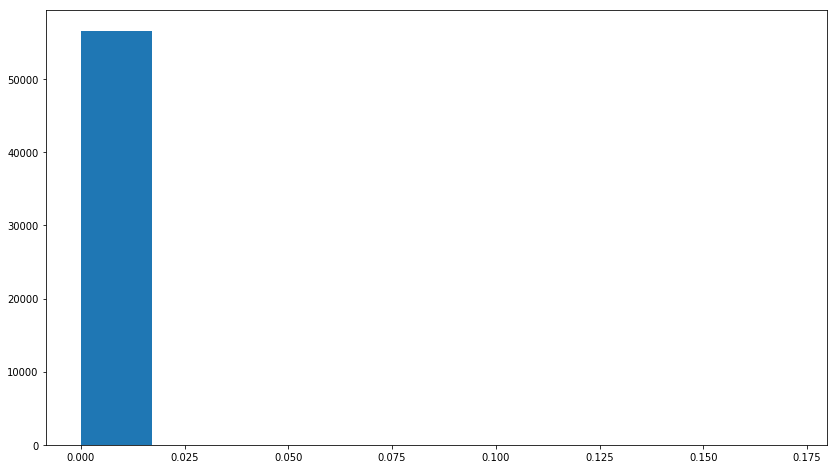

In [33]:
# reconstruction error for the normal transactions in the testing dataset
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

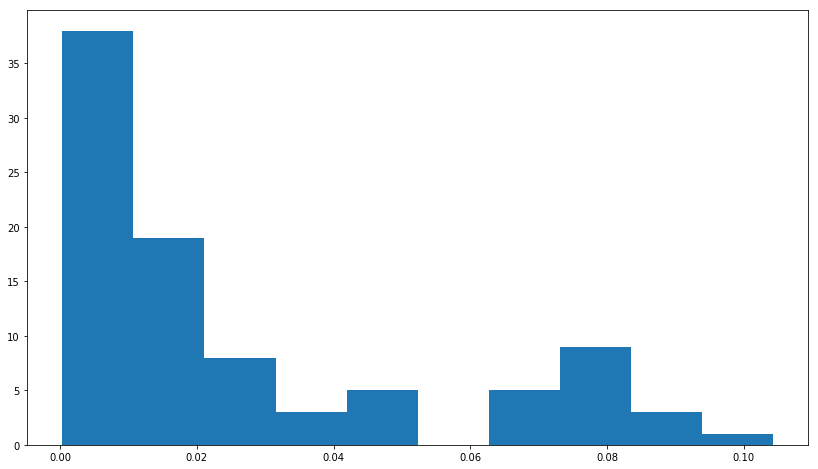

In [34]:
# reconstruction error for the fraud transactions in the testing dataset
fig = plt.figure()
ax = fig.add_subplot(111)
rcParams['figure.figsize'] = 14, 8
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [35]:
anomaly_model.model_performance(valid)


ModelMetricsAutoEncoder: deeplearning
** Reported on test data. **

MSE: NaN
RMSE: NaN


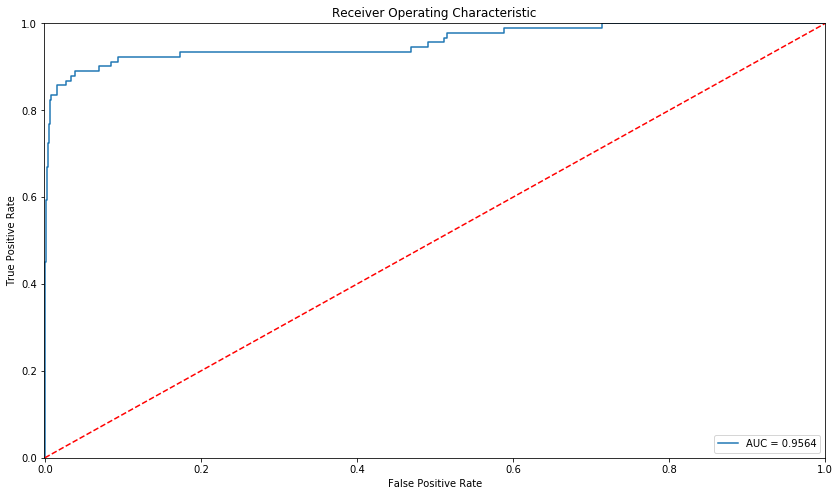

In [37]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

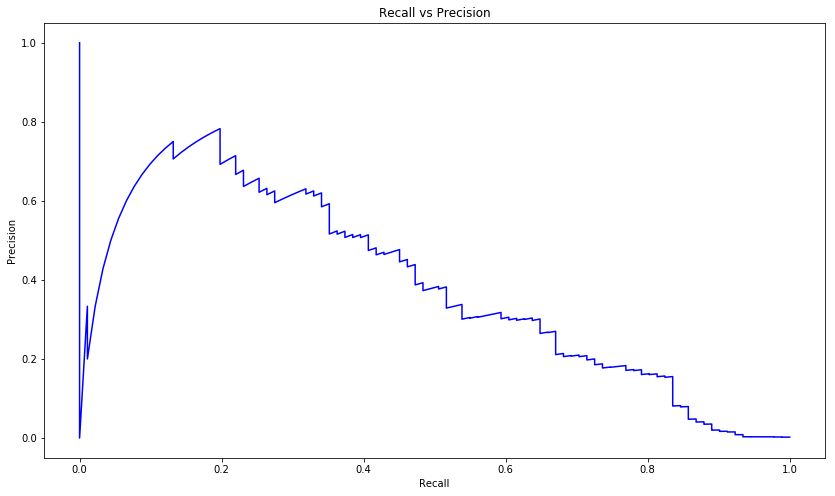

In [38]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

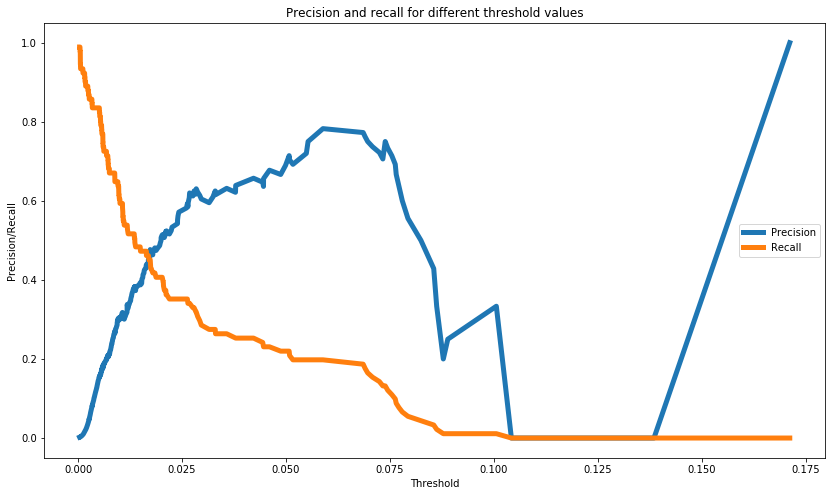

In [39]:

plt.plot(th, precision[1:], label="Precision",linewidth=5)
plt.plot(th, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

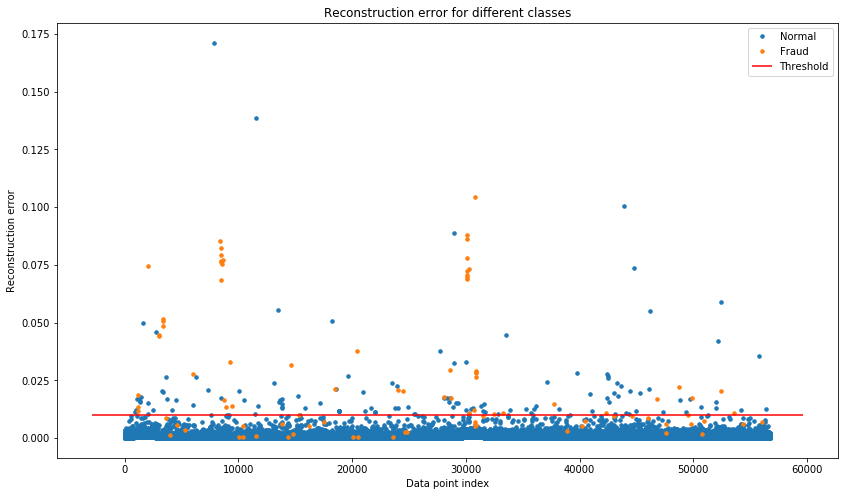

In [40]:

# plot the testing set with the threshold
threshold = 0.01
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

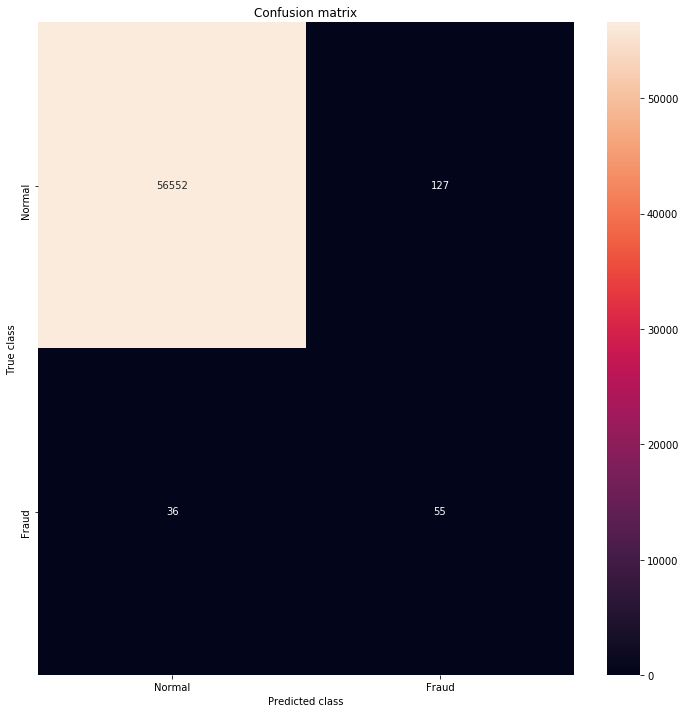

In [41]:

import seaborn as sns
LABELS = ['Normal', 'Fraud']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [42]:

csr = classification_report(error_df.true_class, y_pred)
print(csr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56679
           1       0.30      0.60      0.40        91

    accuracy                           1.00     56770
   macro avg       0.65      0.80      0.70     56770
weighted avg       1.00      1.00      1.00     56770



In [43]:
conf_matrix

array([[56552,   127],
       [   36,    55]])

In [44]:
anomaly_model.mse()

0.0007885060947416674

In [46]:
anomaly_model.auc

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1591523703699_2467


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 1,128 weights/biases, 22.2 KB, 418,664 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,29,Input,0,,,,,,,,,
1,,2,14,Tanh,0,0.0001,0,0.813349,0.240613,0,0.000130763,0.185529,-0.000637114,0.00338712
2,,3,7,Tanh,0,0.0001,0,0.705757,0.370219,0,-0.000848911,0.276175,-0.00023095,0.00125167
3,,4,7,Tanh,0,0.0001,0,0.410913,0.351408,0,0.000398009,0.342236,0.000220885,0.000578455
4,,5,14,Tanh,0,0.0001,0,0.686484,0.388991,0,0.0170542,0.211036,-0.000269929,0.000921061
5,,6,29,Tanh,,0.0001,0,0.596616,0.437233,0,-0.00042102,0.0940379,-0.000663676,0.0036672




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0007885060947416674
RMSE: 0.02808035068765466

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-06-11 16:13:27,0.174 sec,0.00000 obs/sec,0.000000,0,0.0,0.056288,0.003168
1,,2020-06-11 16:13:32,5.171 sec,5823 obs/sec,0.127177,922,28950.0,0.029086,0.000846
2,,2020-06-11 16:13:37,10.179 sec,5584 obs/sec,0.244056,1774,55556.0,0.028344,0.000803
3,,2020-06-11 16:13:42,15.176 sec,5723 obs/sec,0.375138,2730,85395.0,0.028695,0.000823
4,,2020-06-11 16:13:47,20.179 sec,5674 obs/sec,0.495980,3608,112903.0,0.029799,0.000888
5,,2020-06-11 16:13:52,25.178 sec,5638 obs/sec,0.616036,4473,140232.0,0.029253,0.000856
6,,2020-06-11 16:13:57,30.186 sec,5623 obs/sec,0.737401,5362,167859.0,0.029249,0.000856
7,,2020-06-11 16:14:02,35.187 sec,5649 obs/sec,0.864222,6286,196728.0,0.028655,0.000821
8,,2020-06-11 16:14:07,40.192 sec,5679 obs/sec,0.992971,7207,226036.0,0.029970,0.000898
9,,2020-06-11 16:14:12,45.247 sec,5604 obs/sec,1.102269,7995,250916.0,0.028495,0.000812



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V13,1.000000,1.000000,0.162842
1,V11,0.986058,0.986058,0.160571
2,V26,0.981695,0.981695,0.159861
3,V18,0.919887,0.919887,0.149796
4,V24,0.916271,0.916271,0.149207
5,V15,0.899101,0.899101,0.146411
6,V16,0.025669,0.025669,0.004180
7,V9,0.024775,0.024775,0.004034
8,V27,0.024474,0.024474,0.003985
9,V19,0.024051,0.024051,0.003916



See the whole table with table.as_data_frame()


<bound method ModelBase.auc of >